#### DATA SET DESCRIPTION
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature

In [1]:
#import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [5]:
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
## remove unnecessary columns

df.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'], inplace=True)

In [9]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [10]:
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


#### UNIVARIATE ANLYSIS

salary column 

In [11]:
print(df['Salary'].mean())
print(df['Salary'].median())
print(df['Salary'].min())
print(df['Salary'].max())

307699.8499249625
300000.0
35000
4000000


<AxesSubplot:xlabel='Salary'>

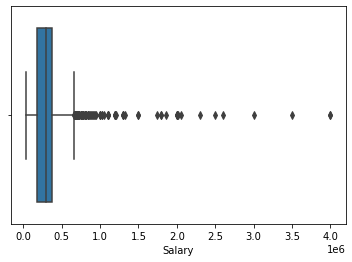

In [12]:
sn.boxplot(x='Salary',data=df)

In [13]:
# salary column contains outliers remove the outliers

q1=df.Salary.quantile(0.25)
q3=df.Salary.quantile(0.75)
iqr=q3-q1

upper=q3+1.5*iqr
lower=q1-1.5*iqr

df=df[(df.Salary<upper) & (df.Salary>lower)]
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


<AxesSubplot:xlabel='Salary'>

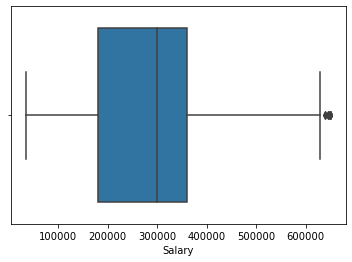

In [14]:
# visualizing after removing outliers
sn.boxplot(x='Salary',data=df)

DATE OF JOINING

In [15]:
df['DOJ'].dt.year.value_counts()

2014    1571
2013     993
2012     568
2011     358
2015     242
2010     141
2009       5
2007       4
2004       1
2006       1
2008       1
1991       1
Name: DOJ, dtype: int64

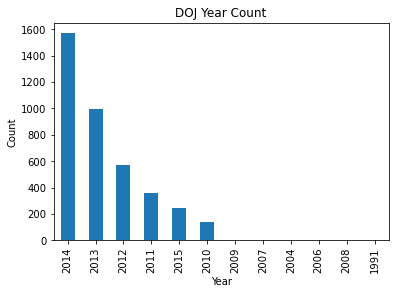

In [16]:
df['DOJ'].dt.year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('DOJ Year Count')
plt.show()

In 2014 most of the employes are joined

DATE OF LEAVING

In [17]:
## date of leaving column has present ,change it to 2015
df['DOL']=df['DOL'].replace('present',2015)

In [18]:
df['DOL']=pd.to_datetime(df['DOL'], errors='coerce')

In [19]:
df['DOL'].dt.year.value_counts()

2015.0    1038
2014.0     636
2013.0     254
2012.0     116
2011.0      36
2010.0       4
2005.0       1
2009.0       1
2008.0       1
Name: DOL, dtype: int64

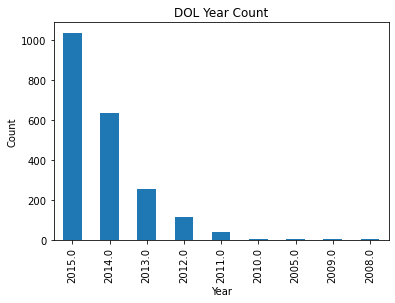

In [20]:
df['DOL'].dt.year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('DOL Year Count')
plt.show()

From the above graph we can observe that most of the employees resign in 2015

DESIGNATION

In [21]:
df['Designation'].value_counts()

software engineer            525
software developer           263
system engineer              205
programmer analyst           139
systems engineer             116
                            ... 
branch manager                 1
associate manager              1
associate developer            1
software trainee engineer      1
risk investigator              1
Name: Designation, Length: 416, dtype: int64

Engineers are highest and followed by developers

#### JOB CITY

In [22]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Manesar', 'Hyderabad',
       'Banglore', 'Noida', 'Kolkata', 'Pune', 'Gurgaon', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'kolkata', 'Gandhi Nagar', 'Una', 'Daman and Diu', 'chennai',
       'GURGOAN', 'vsakhapttnam', 'pune', 'Nagpur', 'Bhagalpur',
       'new delhi - jaisalmer', 'Coimbatore', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Mysore ', 'Kanpur ', 'jaipur', 'Gurgaon ',
       'bangalore', 'CHENNAI', 'Vijayawada', 'Kochi', 'Beawar', 'Alwar',
       'NOIDA', 'Greater noida', 'Siliguri ', 'raipur', 'gurgaon',
       'Bhopal', 'Faridabad', 'Jo

In [23]:
df['JobCity'].value_counts().head(20)

Bangalore        602
-1               452
Noida            357
Hyderabad        329
Pune             284
Chennai          271
New Delhi        191
Gurgaon          189
Mumbai           105
Kolkata           98
Jaipur            45
Mysore            36
Lucknow           36
Navi Mumbai       32
chennai           27
Chandigarh        25
pune              25
Greater Noida     25
Indore            24
Bhubaneswar       22
Name: JobCity, dtype: int64

Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

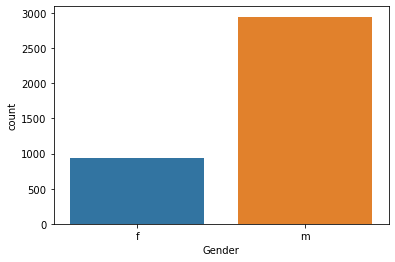

In [24]:
sn.countplot(x='Gender',data=df)

From the above graph we can observe male employees count is more

In [25]:
df['10board'].value_counts()

cbse                                      1353
state board                               1154
0                                          334
icse                                       267
ssc                                        118
                                          ... 
secondary education board of rajasthan       1
sarada high scchool                          1
state(karnataka board)                       1
up borad                                     1
karnataka secondory education board          1
Name: 10board, Length: 268, dtype: int64

<AxesSubplot:>

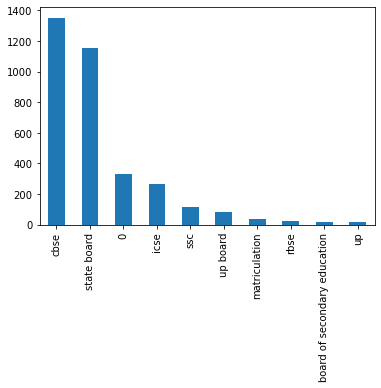

In [26]:
df['10board'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

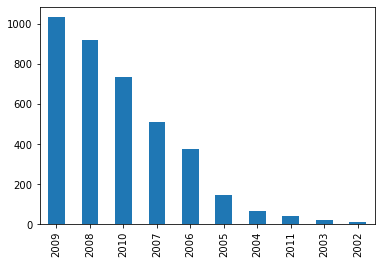

In [27]:
df['12graduation'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

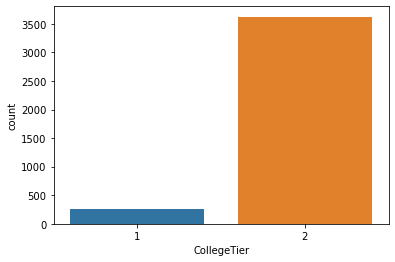

In [28]:
sn.countplot(x='CollegeTier',data=df)

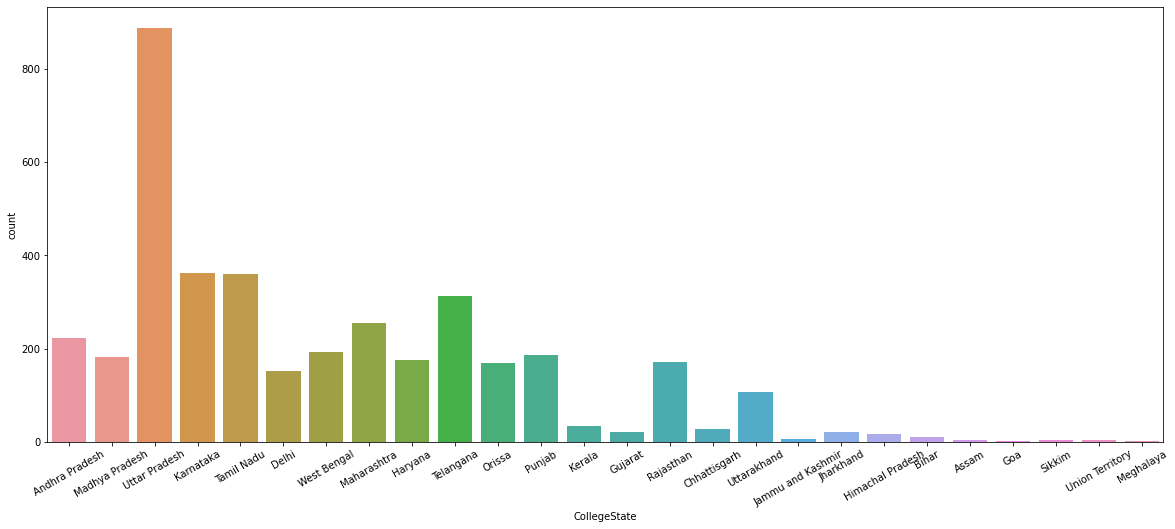

In [29]:
plt.figure(figsize=(20,8))
sn.countplot(x='CollegeState',data=df)
plt.xticks(rotation='30')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3886 non-null   int64         
 1   DOJ                    3886 non-null   datetime64[ns]
 2   DOL                    2087 non-null   datetime64[ns]
 3   Designation            3886 non-null   object        
 4   JobCity                3886 non-null   object        
 5   Gender                 3886 non-null   object        
 6   DOB                    3886 non-null   datetime64[ns]
 7   10percentage           3886 non-null   float64       
 8   10board                3886 non-null   object        
 9   12graduation           3886 non-null   int64         
 10  12percentage           3886 non-null   float64       
 11  12board                3886 non-null   object        
 12  CollegeTier            3886 non-null   int64         
 13  Deg

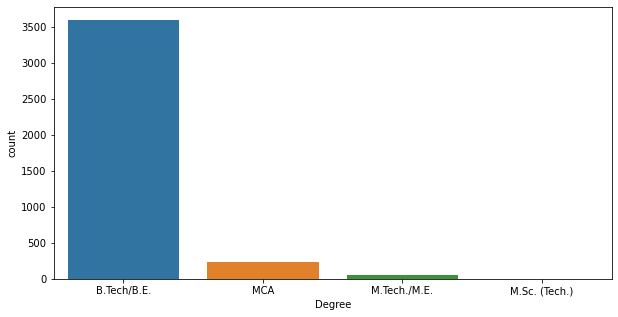

In [31]:
plt.figure(figsize=(10,5))
sn.countplot(x='Degree',data=df)
plt.show()

<AxesSubplot:>

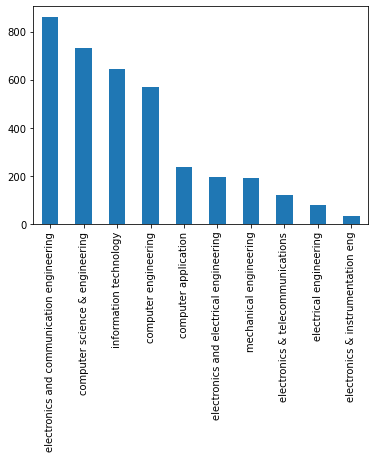

In [32]:
df['Specialization'].value_counts()[:10].plot(kind='bar')

In [33]:
int_cols = df.select_dtypes(include=['int64']).columns
int_cols

Index(['Salary', '12graduation', 'CollegeTier', 'CollegeCityTier',
       'GraduationYear', 'English', 'Logical', 'Quant', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],
      dtype='object')

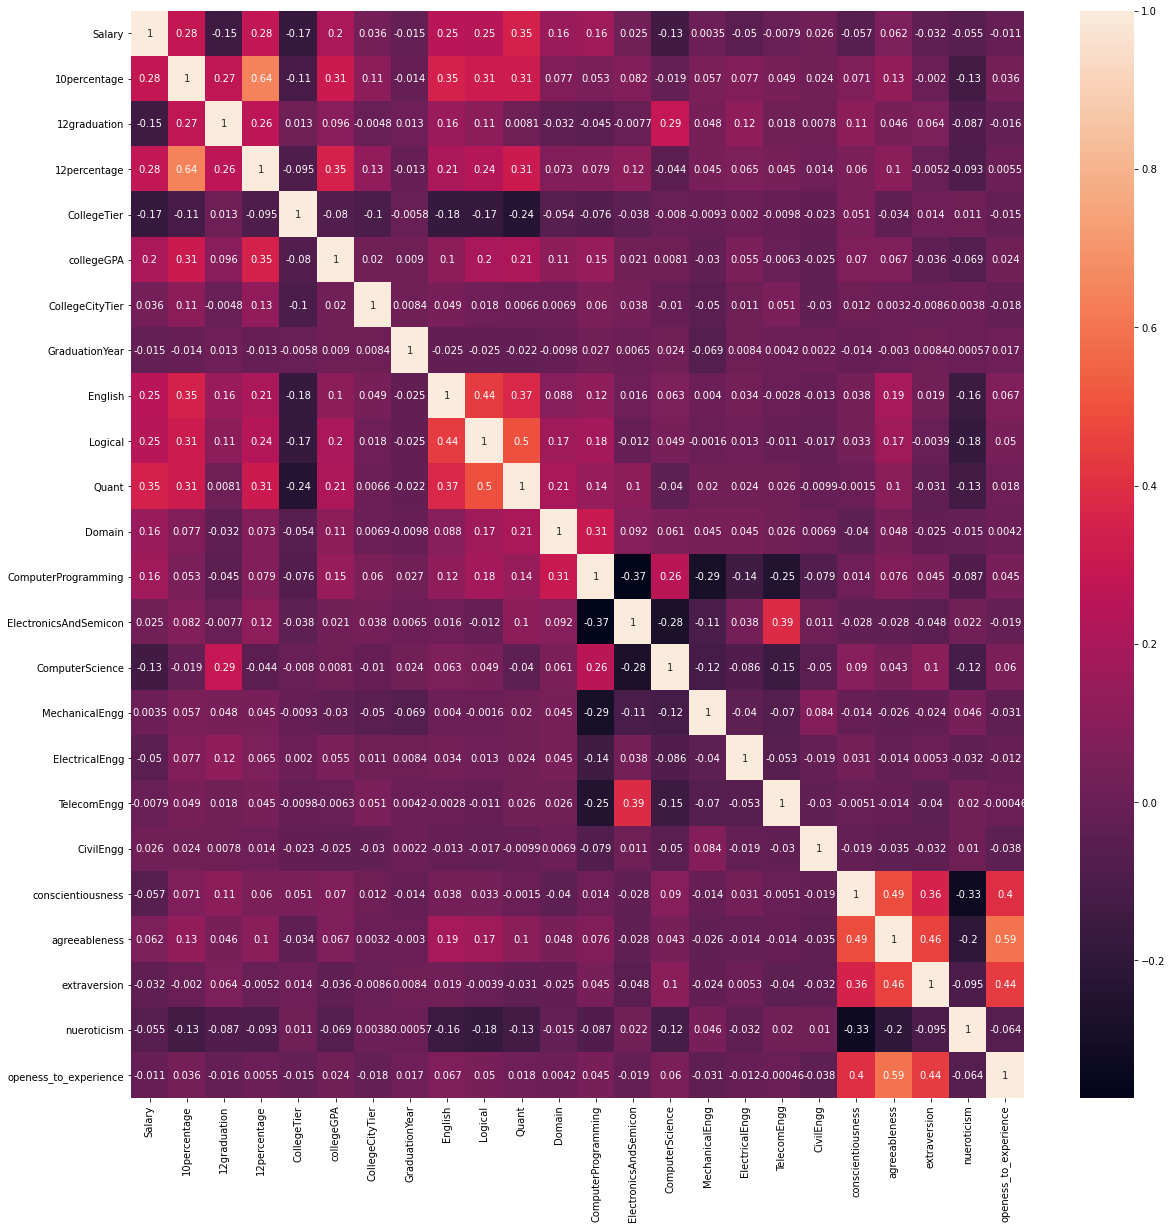

In [34]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(), annot=True)
plt.show()

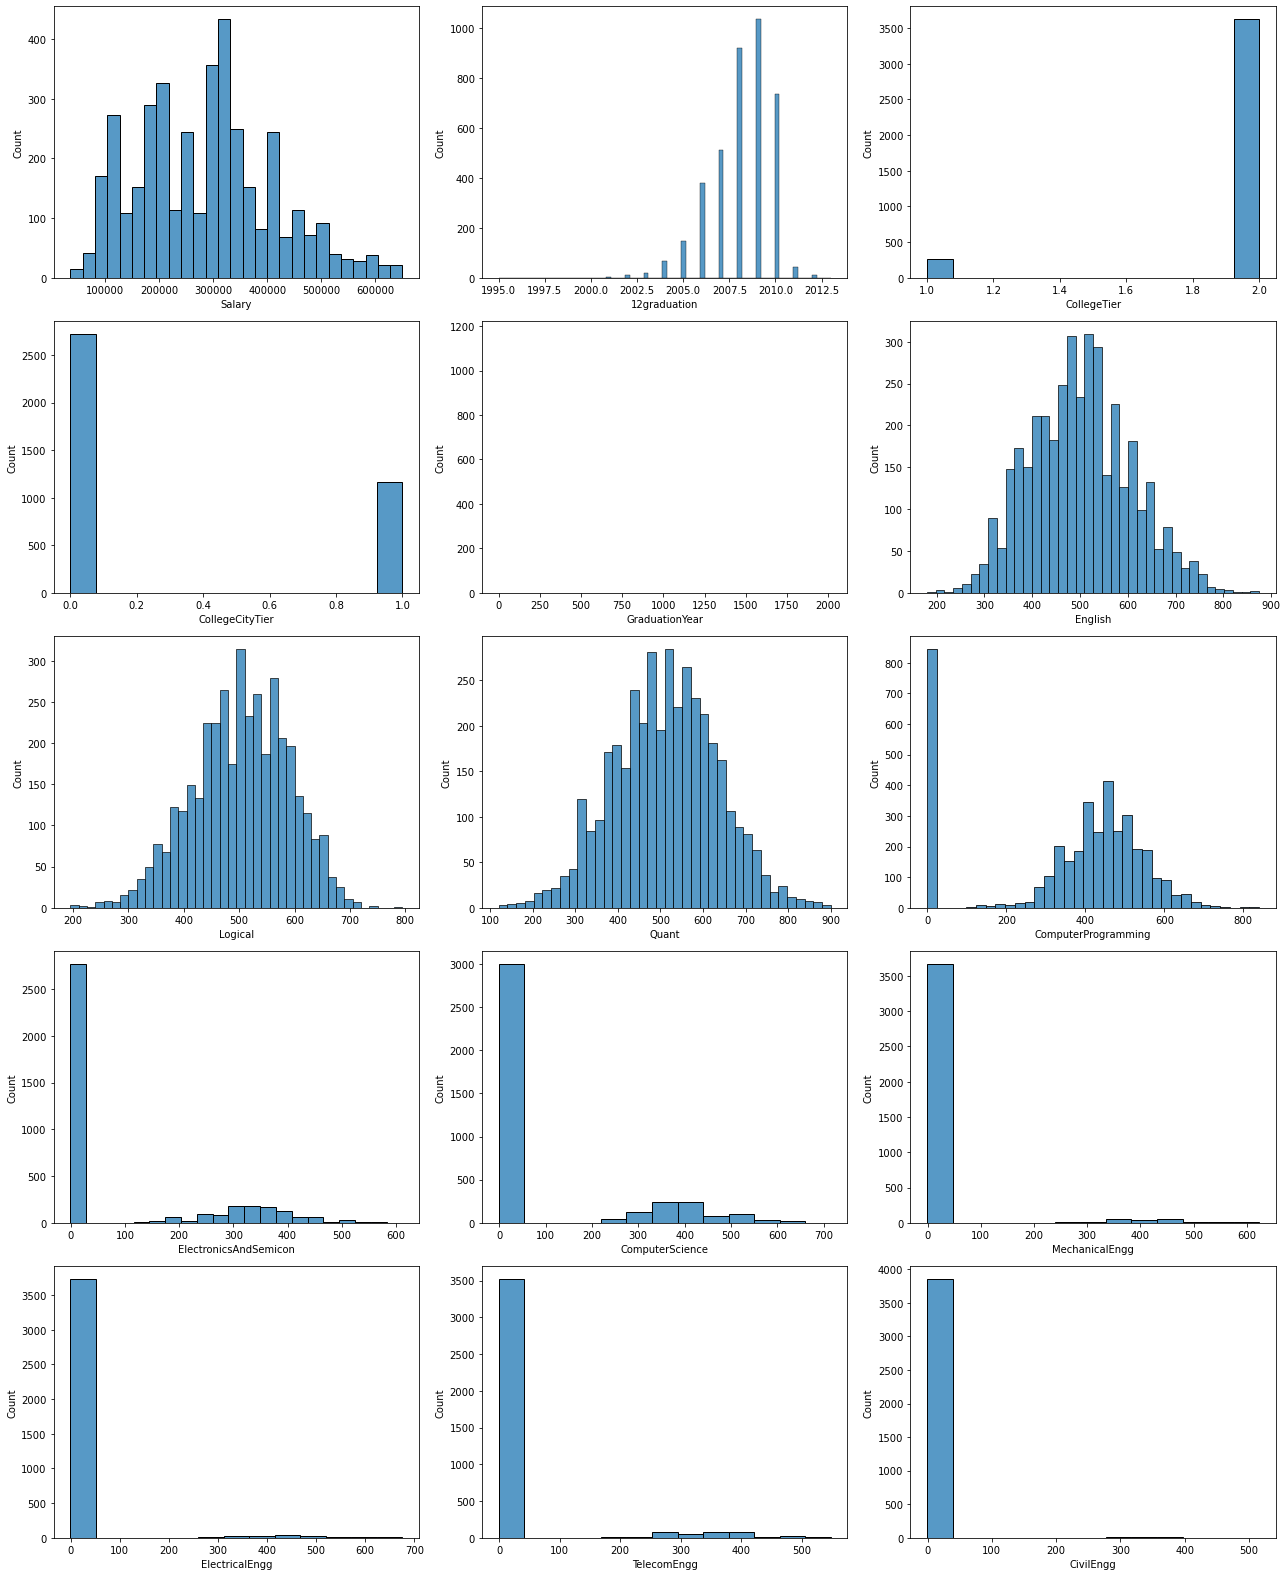

In [35]:
numerical_cols = df.select_dtypes(include=['int64']).columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_cols):
        sn.histplot(x=df[numerical_cols[i]], ax=ax)
        ax.set_xlabel(numerical_cols[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

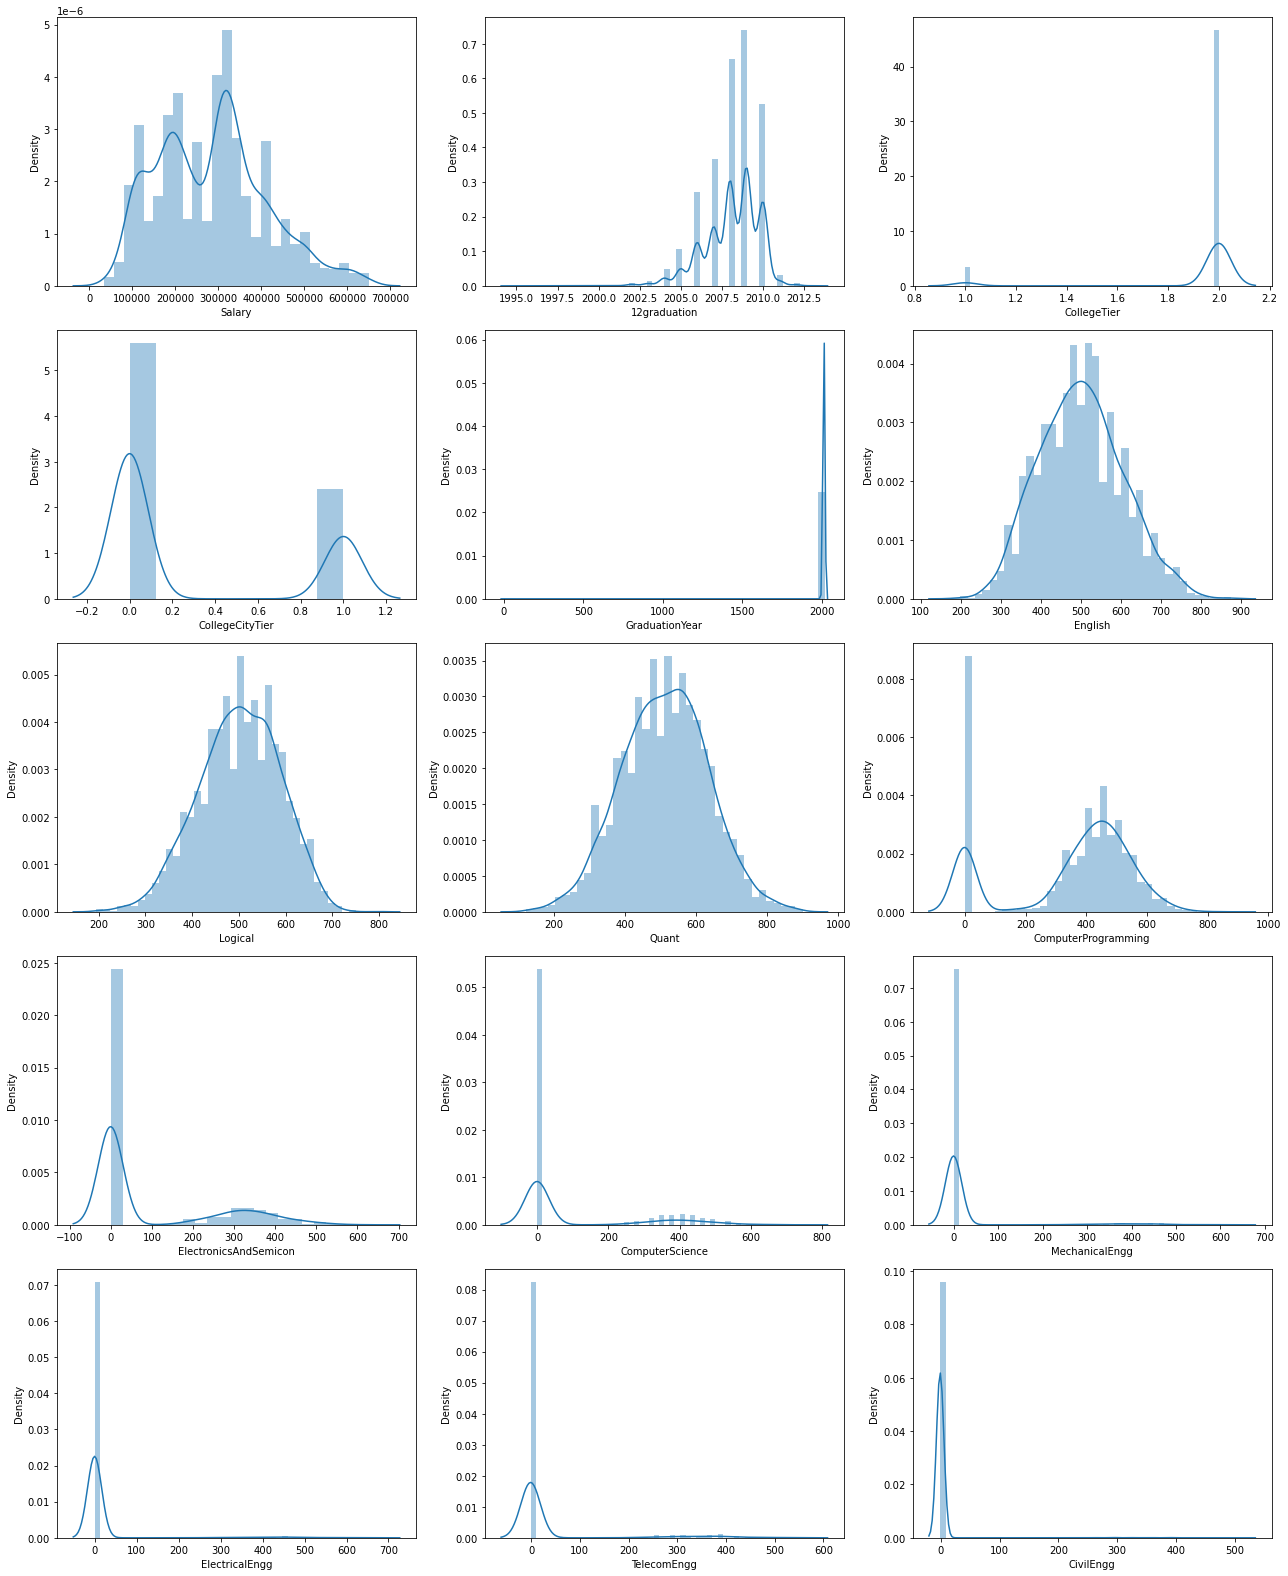

In [36]:
numerical_cols = df.select_dtypes(include=['int64']).columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_cols):
        sn.distplot(x=df[numerical_cols[i]], ax=ax)
        ax.set_xlabel(numerical_cols[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

#### Bivariate Analysis

#### 10percentage vs salary

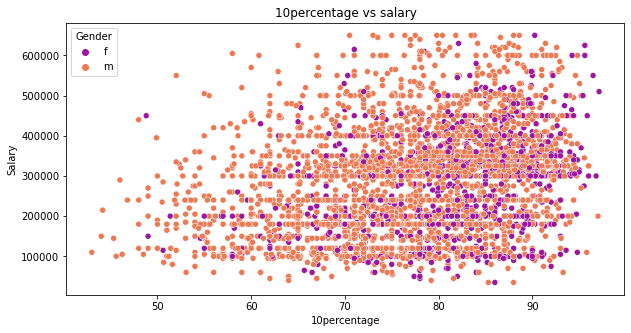

In [37]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='10percentage',y='Salary',hue='Gender',data=df,palette='plasma')
plt.title('10percentage vs salary')
plt.show()

#### 12percentage vs salary

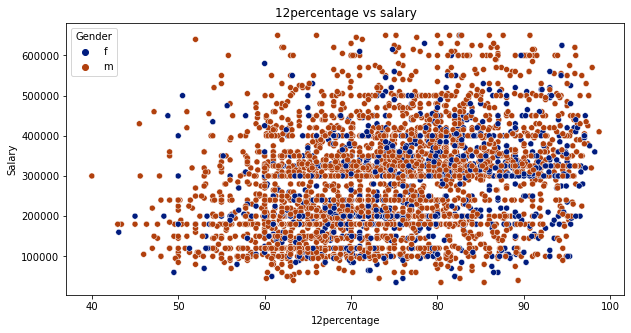

In [38]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='12percentage',y='Salary',hue='Gender',data=df,palette='dark')
plt.title('12percentage vs salary')
plt.show()

#### ComputerProgramming vs salary

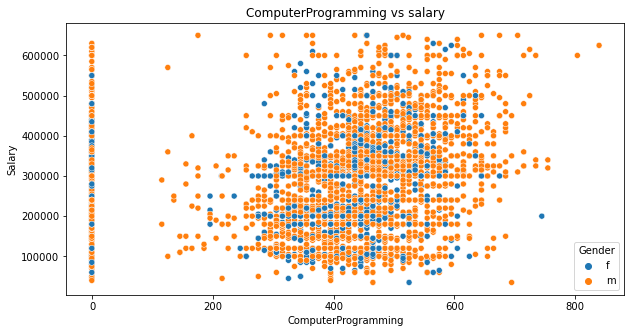

In [39]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='ComputerProgramming',y='Salary',hue='Gender',data=df)
plt.title('ComputerProgramming vs salary')
plt.show()

#### collegeGpa vs salary

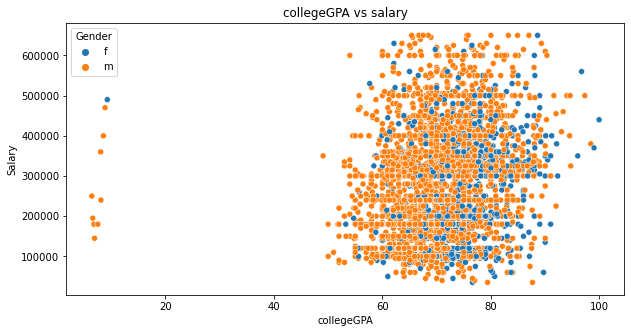

In [40]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='collegeGPA',y='Salary',hue='Gender',data=df)
plt.title('collegeGPA vs salary')
plt.show()

#### ElectronicsAndSemicon vs salary

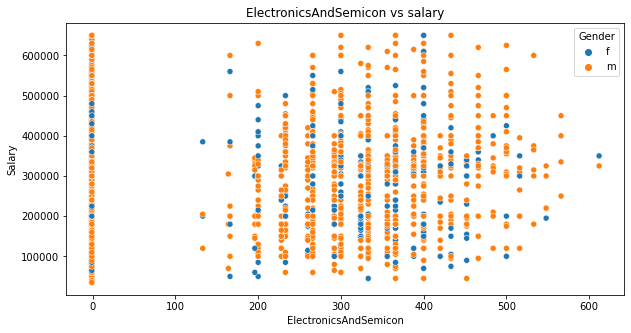

In [41]:
plt.figure(figsize=(10,5))
sn.scatterplot(x='ElectronicsAndSemicon',y='Salary',hue='Gender',data=df)
plt.title('ElectronicsAndSemicon vs salary')
plt.show()

#### salary vs CollegeTier

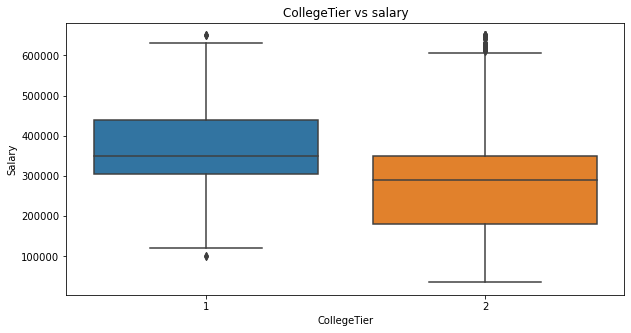

In [42]:
plt.figure(figsize=(10,5))
sn.boxplot(x='CollegeTier',y='Salary',data=df)
plt.title('CollegeTier vs salary')
plt.show()

#### salary vs CollegeCitytier

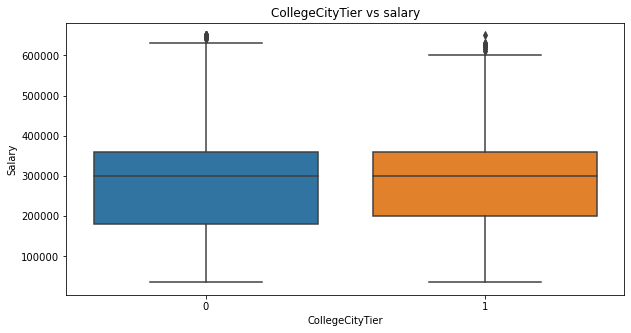

In [43]:
plt.figure(figsize=(10,5))
sn.boxplot(x='CollegeCityTier',y='Salary',data=df)
plt.title('CollegeCityTier vs salary')
plt.show()

#### Gender vs salary

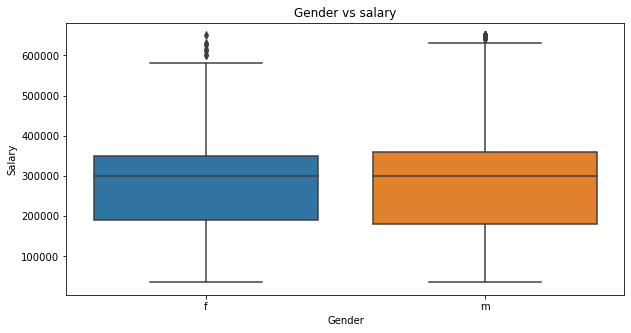

In [44]:
plt.figure(figsize=(10,5))
sn.boxplot(x='Gender',y='Salary',data=df)
plt.title('Gender vs salary')
plt.show()

#### collegestate vs salary

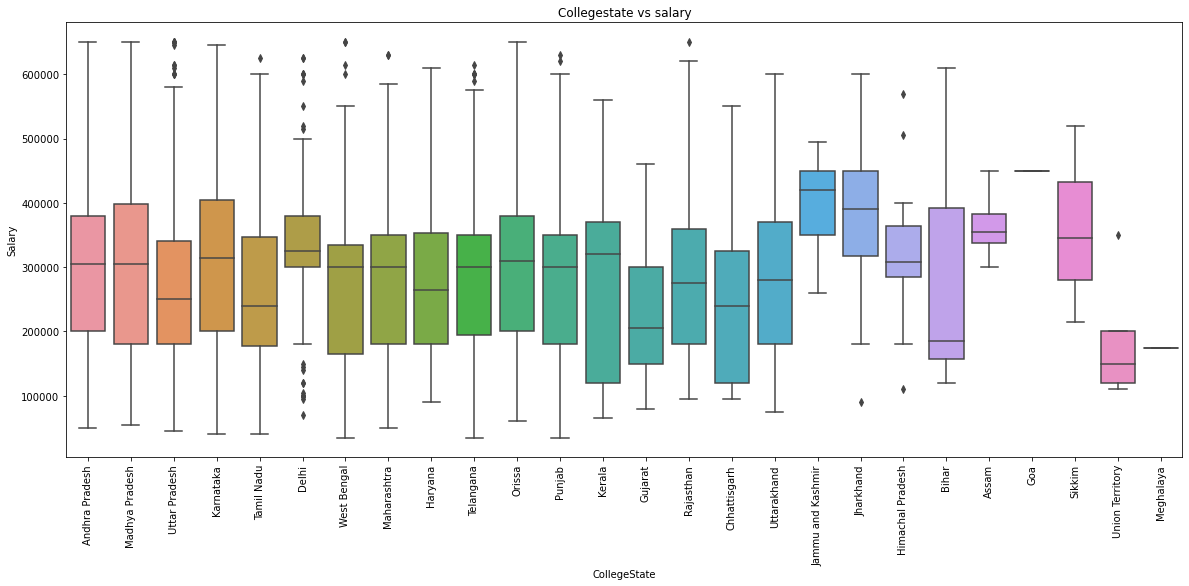

In [45]:
plt.figure(figsize=(20,8))
sn.boxplot(x='CollegeState',y='Salary',data=df)
plt.title('Collegestate vs salary')
plt.xticks(rotation='vertical')
plt.show()

#### Degree vs salary

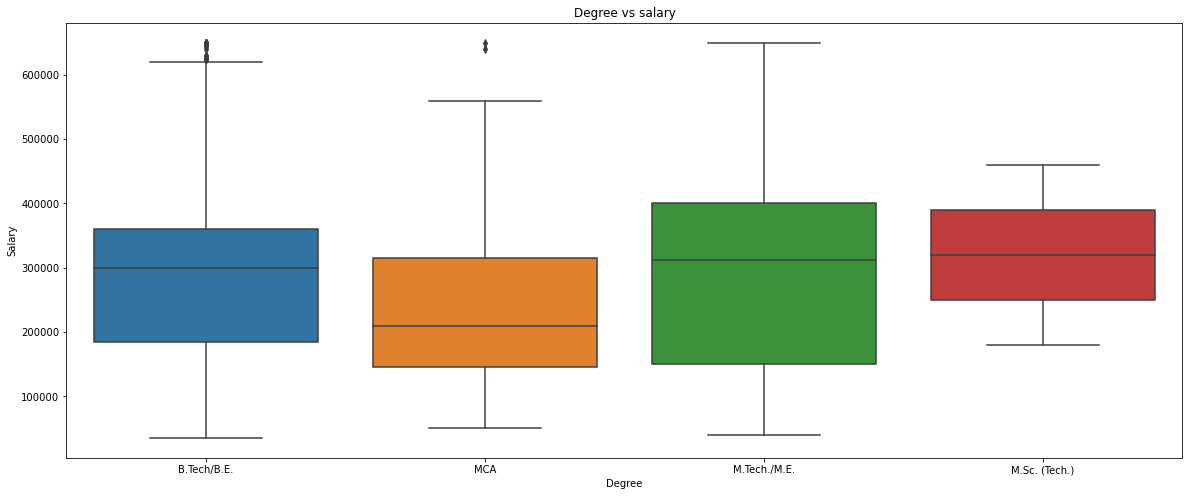

In [46]:
plt.figure(figsize=(20,8))
sn.boxplot(x='Degree',y='Salary',data=df)
plt.title('Degree vs salary')
plt.show()

#### Specialization vs salary

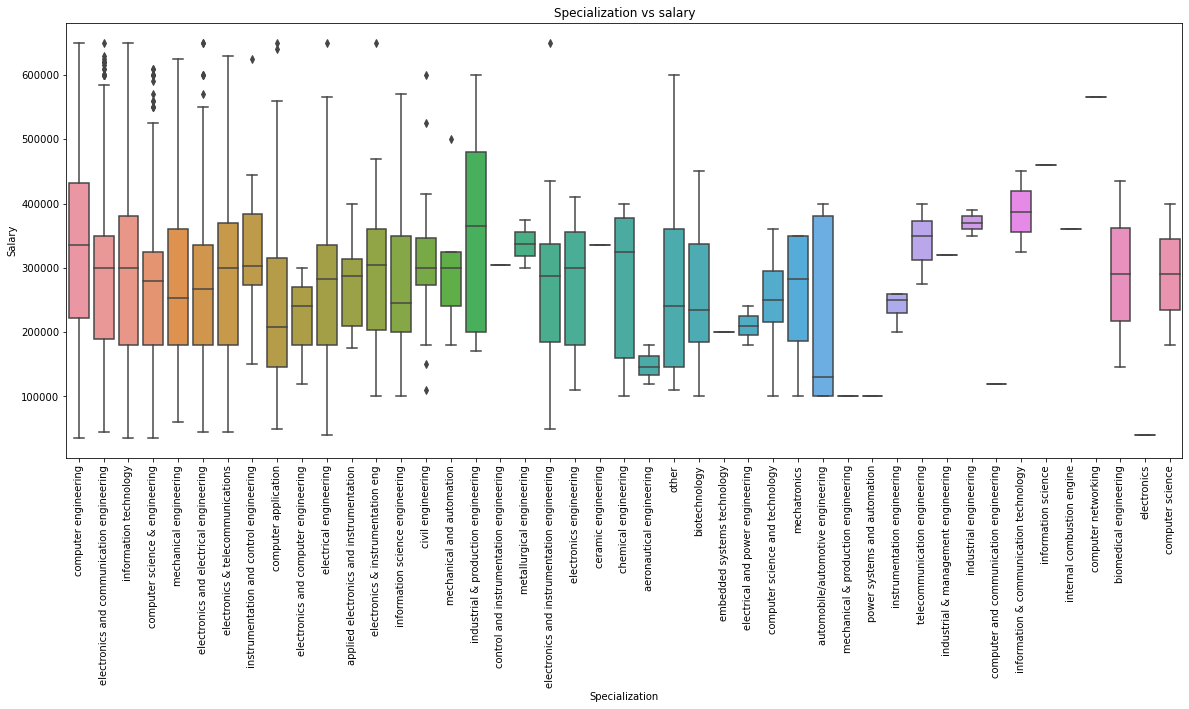

In [47]:
plt.figure(figsize=(20,8))
sn.boxplot(x='Specialization',y='Salary',data=df)
plt.title('Specialization vs salary')
plt.xticks(rotation='vertical')
plt.show()

Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

H0: Null Hypothesis < 3lacs<br>
H1: Alternative Hypothesis > 3 lacs

In [68]:
## create a temp data with the required fields

df_filtered = df.loc[(df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])) 
                     &  (df['Specialization']=='computer science & engineering')]


In [69]:
df_filtered

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,335000,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,340000,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,390000,2013-09-01,NaT,software engineer,Bangalore,m,1991-02-28,86.60,cbse,2009,...,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024
52,400000,2015-04-01,NaT,software engineer,Navi Mumbai,m,1992-03-09,85.20,icse,2010,...,-1,-1,-1,-1,-1,1.1336,0.3789,1.0859,0.65300,0.2889
55,250000,2014-08-01,NaT,software engineer,Mangalore,m,1992-02-13,90.80,state board,2010,...,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,105000,2014-10-01,2015-04-01,software engineer,Kochi/Cochin,f,1991-12-14,93.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.5454,-0.6048,-1.62890,0.2889
3939,100000,2013-07-01,2014-12-01,software engineer,Hyderabad,m,1992-07-05,65.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,-1.9521,-0.6048,1.16010,-1.8189
3959,390000,2014-01-01,2015-04-01,software engineer,Gurgaon,m,1991-09-30,89.60,cbse,2009,...,469,-1,-1,-1,-1,-0.1590,0.7119,0.9322,-0.74150,0.2889
3981,220000,2014-09-01,NaT,software engineer,Gurgaon,m,1991-12-17,53.40,cbse,2009,...,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386


In [70]:
df_filtered['Designation'].value_counts()

software engineer     136
programmer analyst     26
associate engineer      2
Name: Designation, dtype: int64

It shows that hardware engineers doesn't take computers course

In [72]:
print('Minimum salary :',df_filtered['Salary'].min())
print('Maximum salary :',df_filtered['Salary'].max())
print('Average salary :',df_filtered['Salary'].mean())
print("Median salary  :",df_filtered['Salary'].median())

Minimum salary : 85000
Maximum salary : 600000
Average salary : 321067.0731707317
Median salary  : 320000.0


<AxesSubplot:ylabel='Density'>

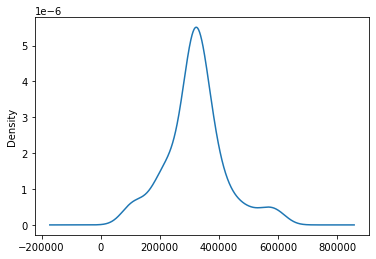

In [75]:
df_filtered['Salary'].plot(kind='kde')

In [88]:
Mean=df_filtered['Salary'].mean()
print(int(Mean))

321067


In [89]:
if int(Mean)>=250000 and int(Mean)<=300000:
    print('Fail to reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


Therefore the claim is false 

- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [90]:
df['Gender'].value_counts()

m    2949
f     937
Name: Gender, dtype: int64

In [91]:
df['Specialization'].value_counts()

electronics and communication engineering      862
computer science & engineering                 731
information technology                         645
computer engineering                           571
computer application                           236
electronics and electrical engineering         194
mechanical engineering                         190
electronics & telecommunications               121
electrical engineering                          80
electronics & instrumentation eng               31
information science engineering                 27
electronics and instrumentation engineering     26
civil engineering                               24
electronics engineering                         19
instrumentation and control engineering         18
biotechnology                                   15
other                                           13
industrial & production engineering              9
applied electronics and instrumentation          8
chemical engineering           

<AxesSubplot:xlabel='Gender', ylabel='count'>

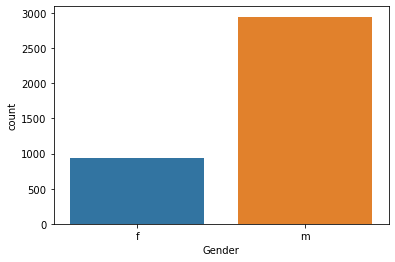

In [92]:
sn.countplot(x='Gender',data=df)

From the above graph we can observe that males ratio is highest.

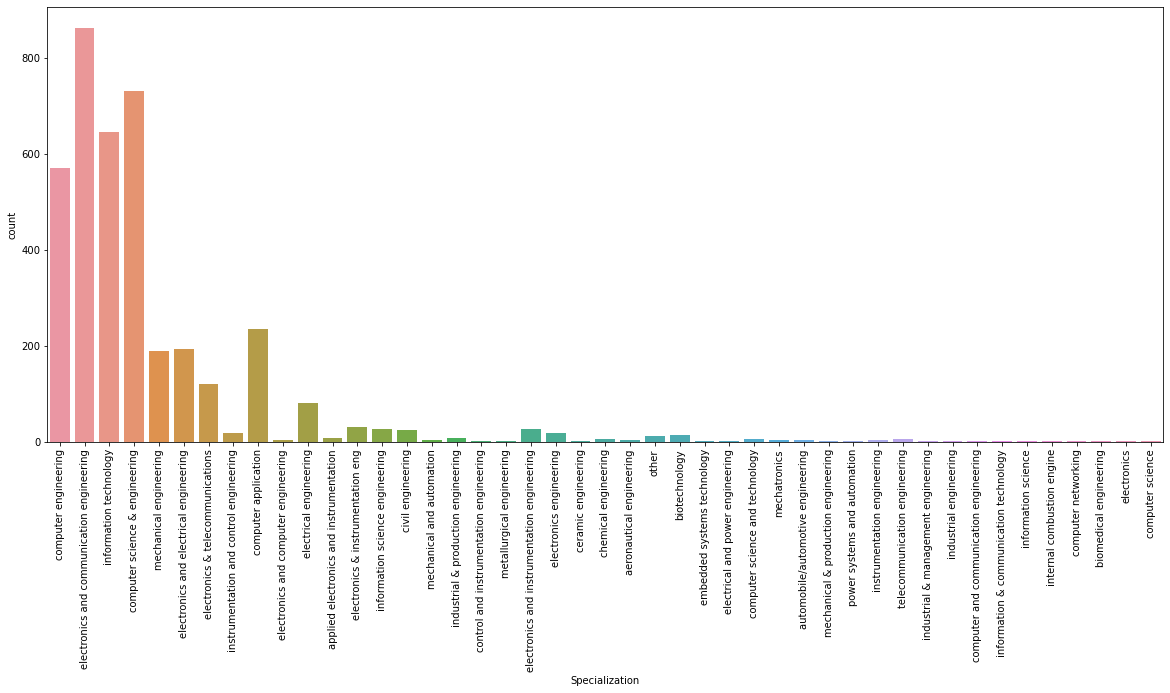

In [95]:
plt.figure(figsize=(20,8))
sn.countplot(x='Specialization',data=df)
plt.xticks(rotation='vertical')
plt.show()

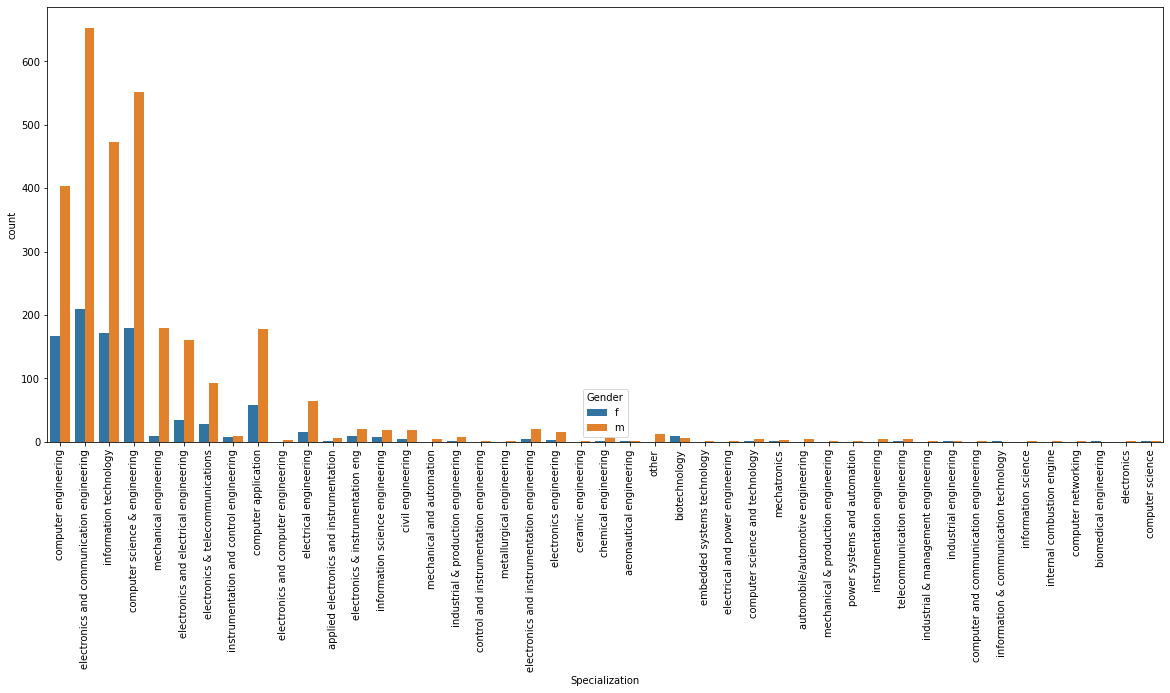

In [96]:
plt.figure(figsize=(20,8))
sn.countplot(x='Specialization',hue='Gender',data=df)
plt.xticks(rotation='vertical')
plt.show()

From the above graph we can observe that most of the male and female students are choosing computer science courses and electronics.
But male students prefer other courses also compared to females. Therefore there is a relationship betwee gender and specialization